In [2]:
library(tidyverse)
library(haven)
library(gam)
library(arrow)


Attaching package: ‘arrow’


The following object is masked from ‘package:lubridate’:

    duration


The following object is masked from ‘package:utils’:

    timestamp




# load data

In [19]:
feature = read_feather('data/feature.feather')

In [20]:
feature$shgparticipate = factor(feature$shgparticipate, levels=c(0,1), labels=c('No','Yes'))

In [22]:
feature$activeloan = factor(feature$activeloan, levels=c(0,1), labels=c('No','Yes'))

In [24]:
feature$savings = factor(feature$savings, levels=c(2,1), labels=c('No','Yes'))

In [25]:
feature$electioncard = factor(feature$electioncard, levels=c(1,2,3), labels=c('Yes','Missing','No'))

In [26]:
feature$rationcard = factor(feature$rationcard, levels=c(1,2,3), labels=c('Yes','Missing','No'))

In [29]:
feature$work_outside = factor(feature$work_outside, levels=c(1,2), labels=c('Yes','No'))

In [30]:
feature$workflag = factor(feature$workflag, levels=c(1,2), labels=c('Yes','No'))

In [31]:
feature$villagenative = factor(feature$villagenative, levels=c(1,2), labels=c('Yes','No'))

In [33]:
feature$caste = factor(feature$caste, levels=c(1,2,3,4), labels=c('SCC', 'SCT', 'OBC','GEN'))

In [34]:
head(feature)

age,educ,villagenative,caste,subcaste,workflag,occupation,privategovt,work_outside,savings,electioncard,rationcard,rationcard_colour,shgparticipate,activeloan
<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>
38,2,Yes,OBC,2,Yes,13,2,Yes,No,Yes,Yes,1,No,No
27,2,No,OBC,2,No,0,0,NA,No,Yes,Yes,1,No,No
29,7,Yes,OBC,2,Yes,1,2,No,No,Yes,Yes,1,No,No
24,10,No,OBC,2,Yes,15,2,No,Yes,Yes,No,0,Yes,No
58,10,Yes,OBC,2,Yes,1,2,No,No,Yes,Yes,1,No,Yes
40,16,Yes,OBC,2,Yes,1,3,No,No,Yes,Yes,1,No,No


# shgparticpate vs. activeloan

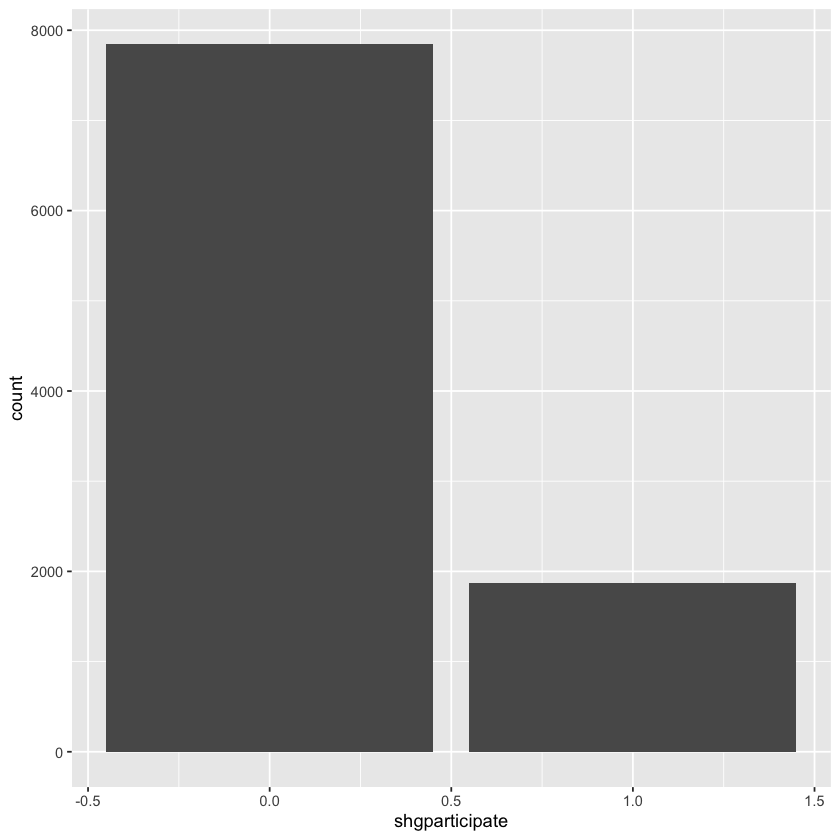

In [8]:
feature %>% ggplot(aes(x=shgparticipate)) + geom_bar()

In [9]:
feature %>% group_by(shgparticipate, activeloan) %>% count() %>%
    group_by(shgparticipate) %>% mutate(ratio = n / sum(n))

shgparticipate,activeloan,n,ratio
<dbl>,<dbl>,<int>,<dbl>
0,0,5561,0.7091303
0,1,2281,0.2908697
1,0,684,0.3661670
1,1,1184,0.6338330


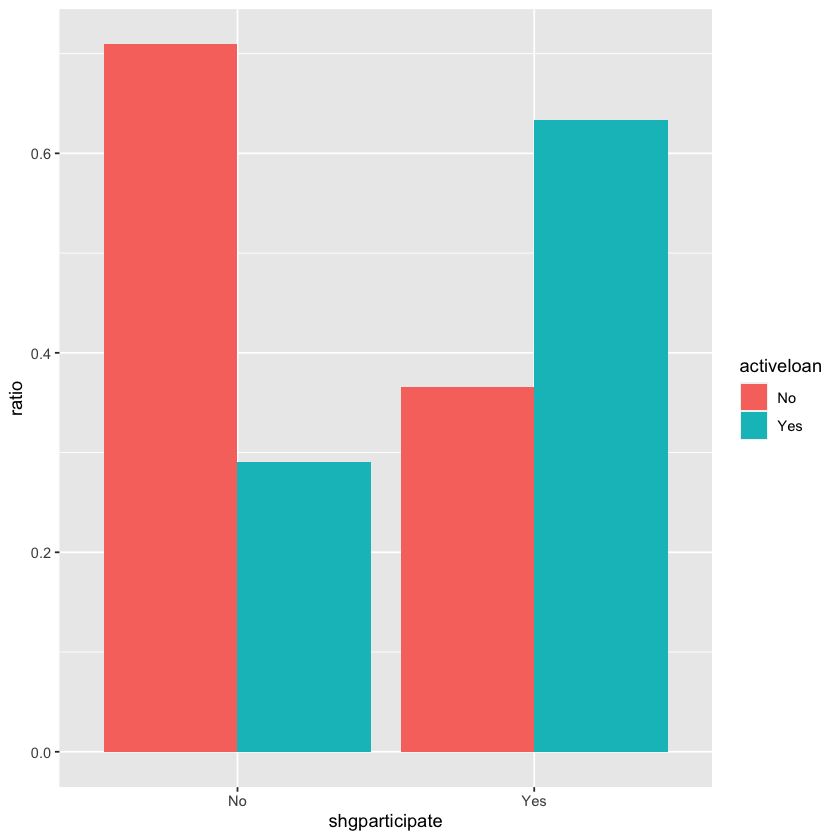

In [35]:
feature %>% group_by(shgparticipate, activeloan) %>% count() %>%
    group_by(shgparticipate) %>% mutate(ratio = n / sum(n)) %>%
    ggplot(aes(y=ratio, x=shgparticipate, fill=activeloan)) + 
    geom_bar(position="dodge", stat="identity")

# villagenative

In [37]:
feature %>% group_by(villagenative) %>% summarise(n=n(), shg_rate = mean(shgparticipate=='Yes', na.rm=TRUE), loan_rate=mean(activeloan=='Yes', na.rm=TRUE))

villagenative,n,shg_rate,sav_rate
<fct>,<int>,<dbl>,<dbl>
Yes,5459,0.09104232,0.3845027
No,4251,0.32251235,0.3213362


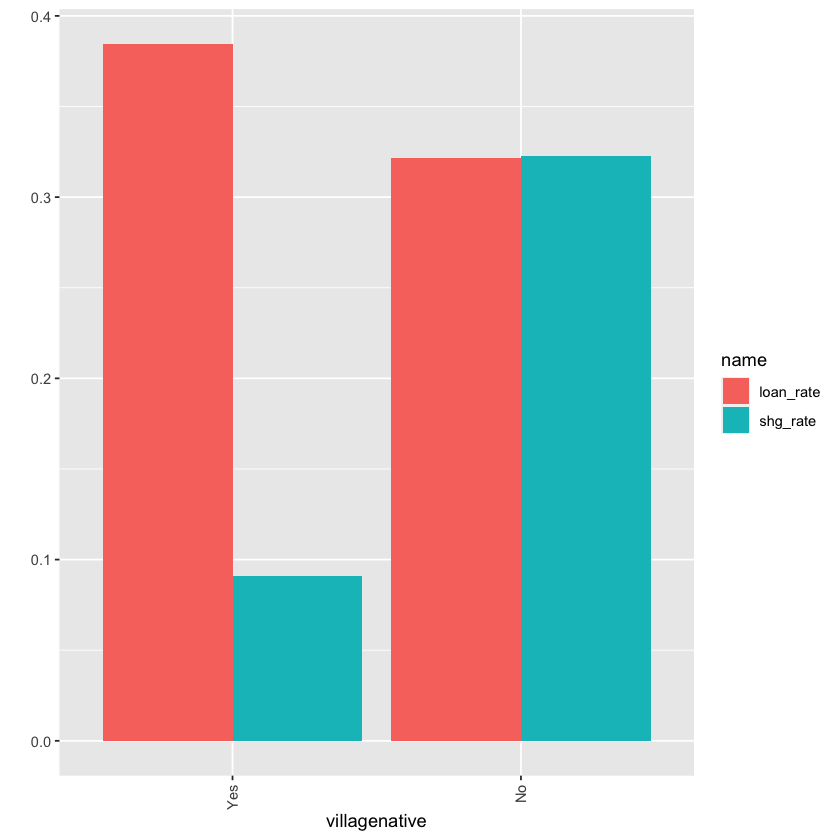

In [38]:
feature %>% group_by(villagenative) %>% summarise(n=n(), shg_rate = mean(shgparticipate=='Yes', na.rm=TRUE), loan_rate=mean(activeloan=='Yes', na.rm=TRUE)) %>%
    pivot_longer(cols=c('shg_rate', 'loan_rate'), values_to='value') %>%
    ggplot(aes(y=value, x=villagenative, fill=name)) + geom_bar(stat='identity', position='dodge') +
    scale_x_discrete(guide = guide_axis(angle = 90)) + labs(y="")

# caste

In [49]:
feature %>% group_by(caste) %>% summarise(n=n(), shg_rate = mean(shgparticipate=='Yes', na.rm=TRUE), loan_rate=mean(activeloan=='Yes', na.rm=TRUE))

caste,n,shg_rate,loan_rate
<fct>,<int>,<dbl>,<dbl>
SCC,2589,0.21205098,0.3310158
SCT,514,0.21400778,0.4241245
OBC,5314,0.18272488,0.3656379
GEN,1242,0.18840580,0.3421900
NA,51,0.07843137,0.4313725


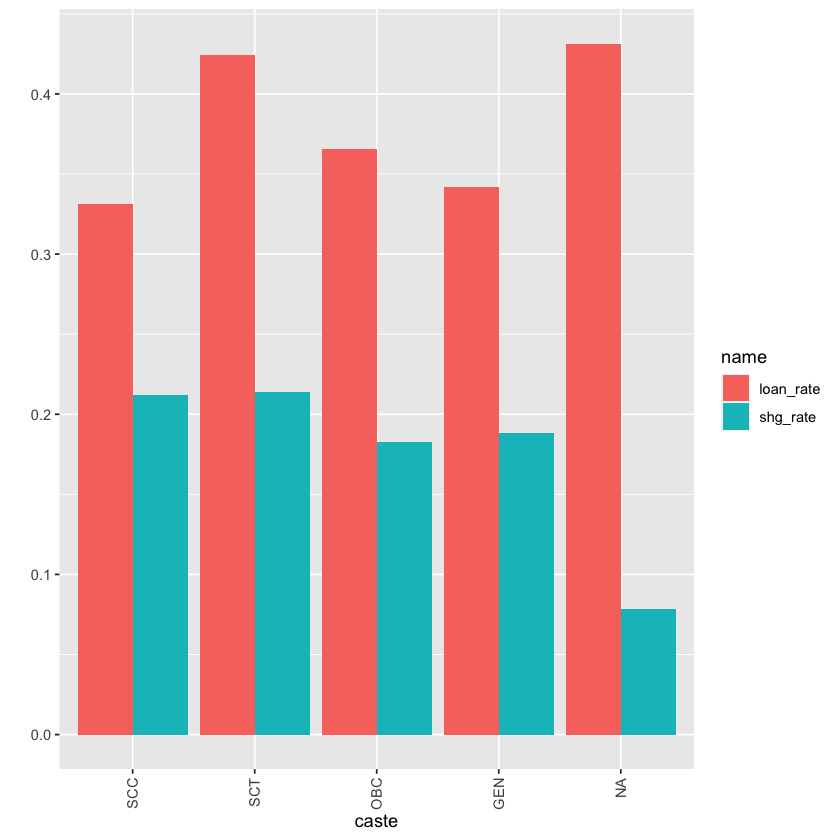

In [51]:
feature %>% group_by(caste) %>% summarise(n=n(), shg_rate = mean(shgparticipate=='Yes', na.rm=TRUE), loan_rate=mean(activeloan=='Yes', na.rm=TRUE)) %>%
    pivot_longer(cols=c('shg_rate', 'loan_rate'), values_to='value') %>%
    ggplot(aes(y=value, x=caste, fill=name)) + geom_bar(stat='identity', position='dodge') +
    scale_x_discrete(guide = guide_axis(angle = 90)) + labs(y="")

# work_outside

In [39]:
feature %>% group_by(work_outside) %>% summarise(n=n(), shg_rate = mean(shgparticipate=='Yes', na.rm=TRUE), sav_rate=mean(savings=='Yes', na.rm=TRUE))

work_outside,n,shg_rate,sav_rate
<fct>,<int>,<dbl>,<dbl>
Yes,2211,0.1311624,0.3886878
No,3975,0.1851572,0.4119426
NA,3524,0.2389330,0.3344720


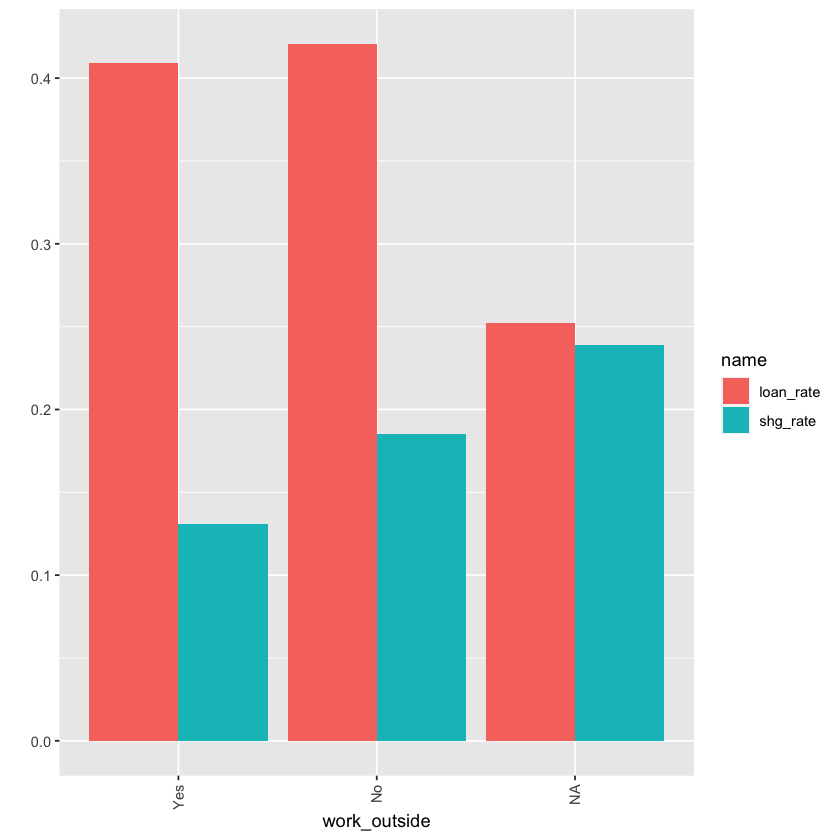

In [40]:
feature %>% group_by(work_outside) %>% summarise(n=n(), shg_rate = mean(shgparticipate=='Yes', na.rm=TRUE), loan_rate=mean(activeloan=='Yes', na.rm=TRUE)) %>%
    pivot_longer(cols=c('shg_rate', 'loan_rate'), values_to='value') %>%
    ggplot(aes(y=value, x=work_outside, fill=name)) + geom_bar(stat='identity', position='dodge') +
    scale_x_discrete(guide = guide_axis(angle = 90)) + labs(y="")

# electioncard

In [52]:
feature %>% group_by(electioncard) %>% summarise(n=n(), shg_rate = mean(shgparticipate=='Yes', na.rm=TRUE), sav_rate=mean(savings=='Yes', na.rm=TRUE))

electioncard,n,shg_rate,sav_rate
<fct>,<int>,<dbl>,<dbl>
Yes,8308,0.2000481,0.4002171
Missing,130,0.1769231,0.3230769
No,1271,0.1431943,0.2429022
NA,1,1.0000000,0.0000000


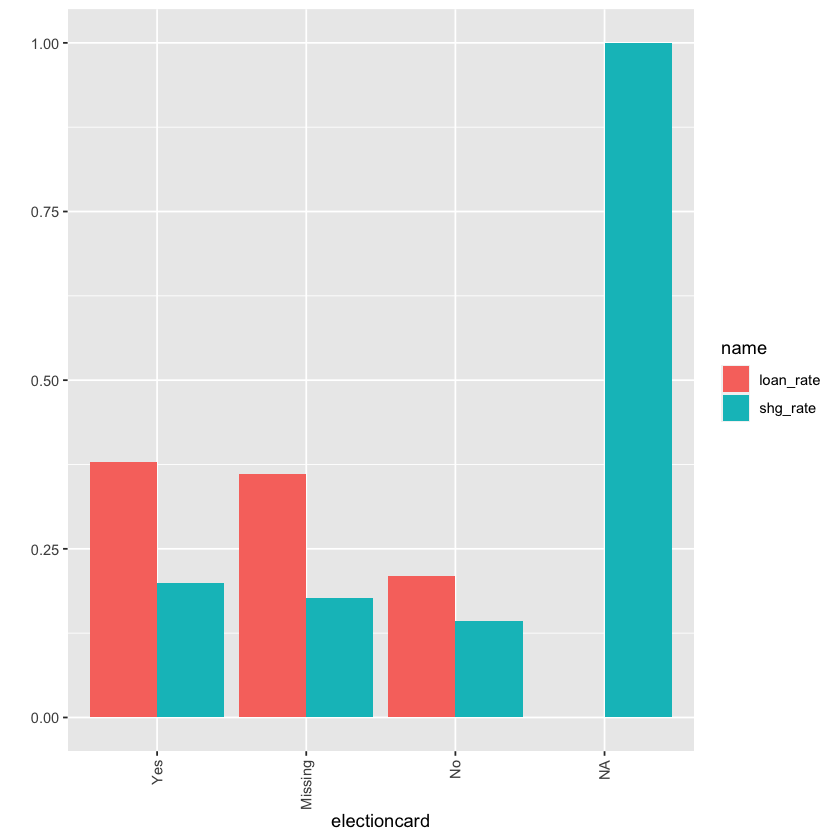

In [53]:
feature %>% group_by(electioncard) %>% summarise(n=n(), shg_rate = mean(shgparticipate=='Yes', na.rm=TRUE), loan_rate=mean(activeloan=='Yes', na.rm=TRUE)) %>%
    pivot_longer(cols=c('shg_rate', 'loan_rate'), values_to='value') %>%
    ggplot(aes(y=value, x=electioncard, fill=name)) + geom_bar(stat='identity', position='dodge') +
    scale_x_discrete(guide = guide_axis(angle = 90)) + labs(y="")

# rationcard

In [55]:
feature %>% group_by(rationcard) %>% summarise(n=n(), shg_rate = mean(shgparticipate=='Yes', na.rm=TRUE), sav_rate=mean(savings=='Yes', na.rm=TRUE))

rationcard,n,shg_rate,sav_rate
<fct>,<int>,<dbl>,<dbl>
Yes,8359,0.2003828,0.3865788
Missing,45,0.1777778,0.4000000
No,1305,0.1409962,0.3266718
NA,1,1.0000000,0.0000000


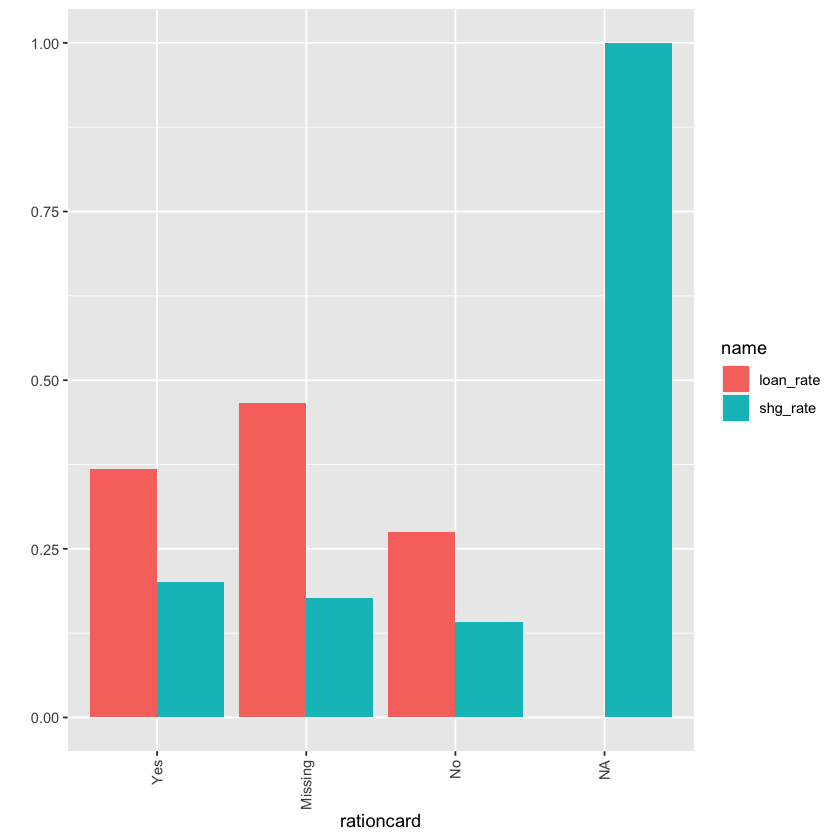

In [54]:
feature %>% group_by(rationcard) %>% summarise(n=n(), shg_rate = mean(shgparticipate=='Yes', na.rm=TRUE), loan_rate=mean(activeloan=='Yes', na.rm=TRUE)) %>%
    pivot_longer(cols=c('shg_rate', 'loan_rate'), values_to='value') %>%
    ggplot(aes(y=value, x=rationcard, fill=name)) + geom_bar(stat='identity', position='dodge') +
    scale_x_discrete(guide = guide_axis(angle = 90)) + labs(y="")

# rationcard_colour

In [56]:
feature %>% group_by(rationcard_colour) %>% summarise(n=n(), shg_rate = mean(shgparticipate=='Yes', na.rm=TRUE), sav_rate=mean(savings=='Yes', na.rm=TRUE))

rationcard_colour,n,shg_rate,sav_rate
<dbl>,<int>,<dbl>,<dbl>
-999,12,0.0000000,0.4166667
0,1609,0.1448104,0.3316708
1,2366,0.1901944,0.3307953
2,3813,0.2334120,0.3823529
3,851,0.1504113,0.4669811
4,111,0.2432432,0.4774775
5,121,0.2231405,0.4132231
6,827,0.1366385,0.4793689


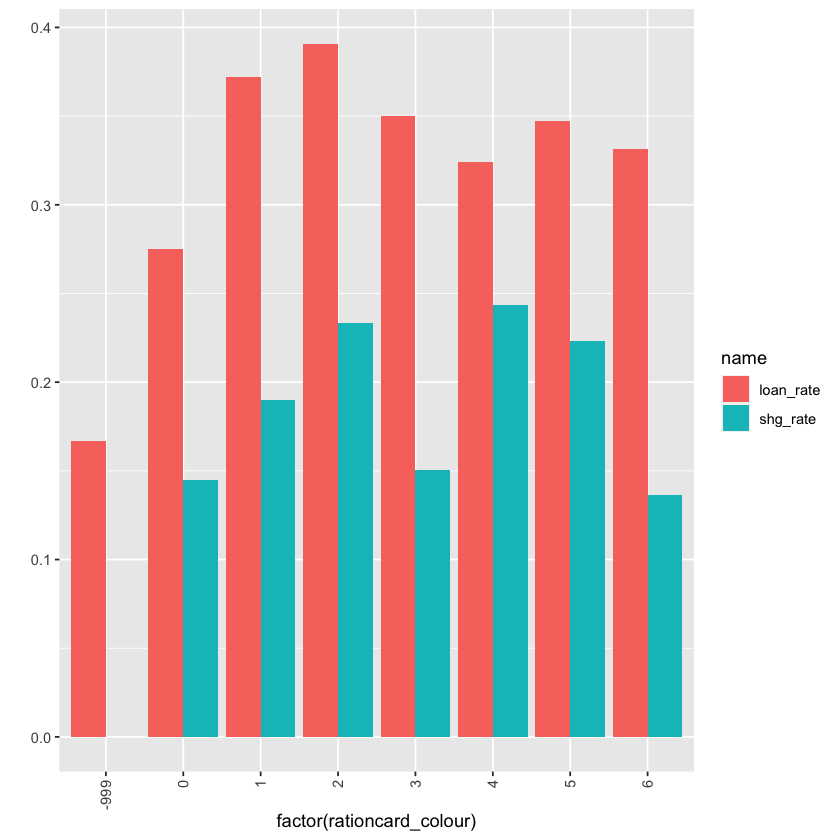

In [58]:
feature %>% group_by(rationcard_colour) %>% summarise(n=n(), shg_rate = mean(shgparticipate=='Yes', na.rm=TRUE), loan_rate=mean(activeloan=='Yes', na.rm=TRUE)) %>%
    pivot_longer(cols=c('shg_rate', 'loan_rate'), values_to='value') %>%
    ggplot(aes(y=value, x=factor(rationcard_colour), fill=name)) + geom_bar(stat='identity', position='dodge') +
    scale_x_discrete(guide = guide_axis(angle = 90)) + labs(y="")

# educ

In [41]:
feature %>% group_by(educ) %>% 
    summarise(n=n(), shg_rate = mean(shgparticipate=='Yes', na.rm=TRUE), 
              loan_rate=mean(activeloan=='Yes', na.rm=TRUE))

educ,n,shg_rate,loan_rate
<dbl>,<int>,<dbl>,<dbl>
1,67,0.1492537,0.3880597
2,206,0.1747573,0.3834951
3,287,0.1777003,0.3588850
4,468,0.1794872,0.3910256
5,532,0.1729323,0.3477444
6,236,0.1525424,0.3516949
7,817,0.1787026,0.3365973
8,336,0.1785714,0.3541667
9,511,0.1565558,0.3424658


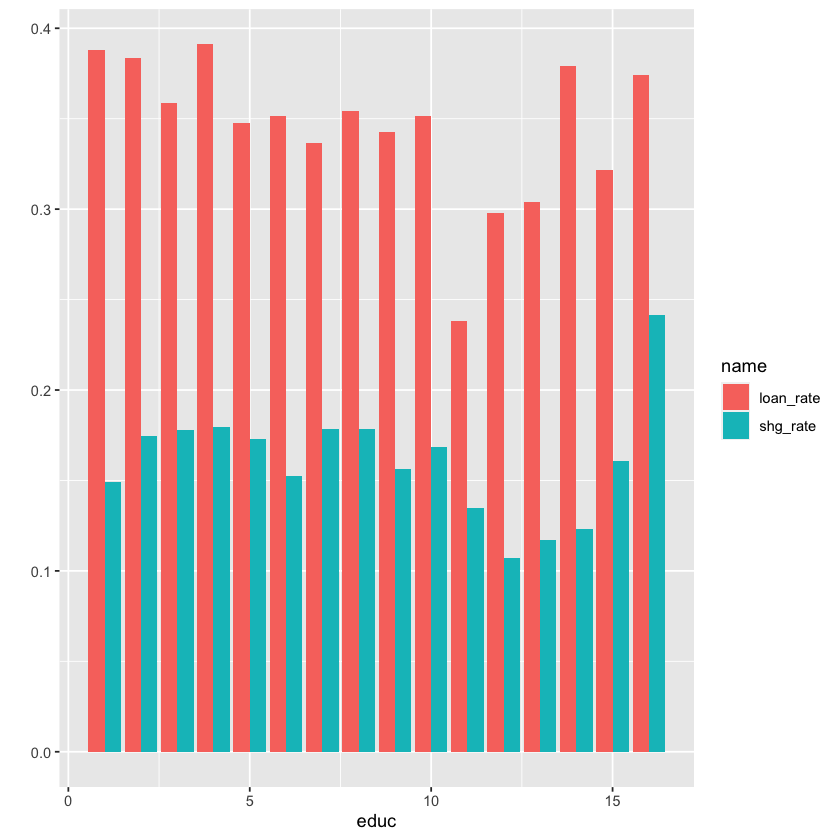

In [43]:
feature %>% group_by(educ) %>% 
    summarise(n=n(), shg_rate = mean(shgparticipate=='Yes', na.rm=TRUE), 
              loan_rate=mean(activeloan=='Yes', na.rm=TRUE)) %>%
    pivot_longer(cols=c('shg_rate', 'loan_rate'), values_to='value') %>%
    ggplot(aes(y=value, x=educ, fill=name)) + geom_bar(stat='identity', position='dodge') +
    labs(y="")

# age

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


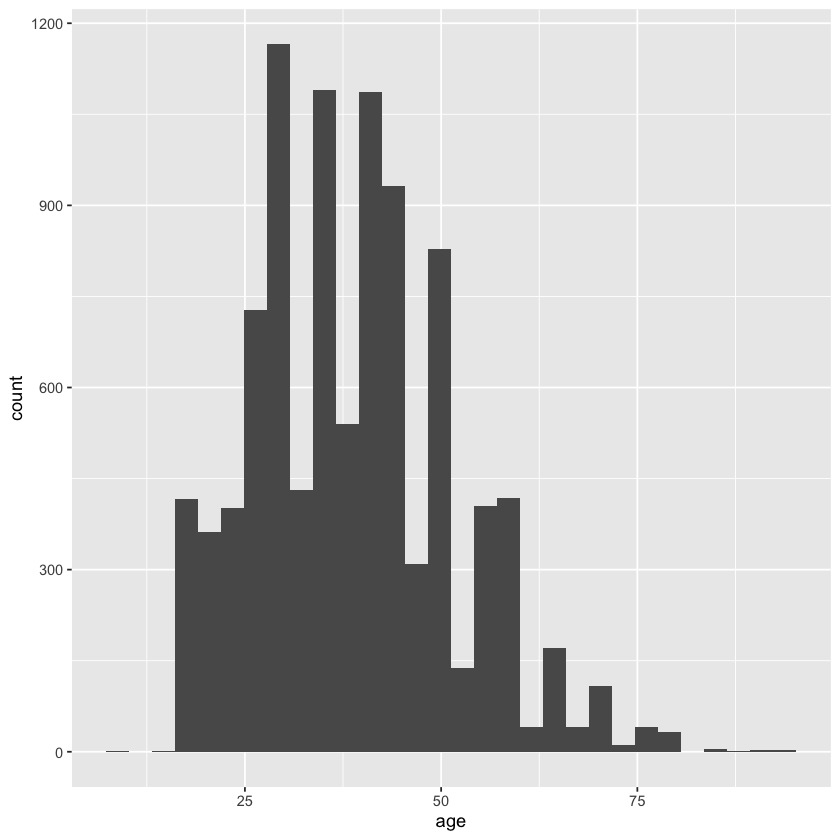

In [44]:
feature %>% select(age, shgparticipate, activeloan) %>%
    # pivot_longer(cols=c('shgparticipate', 'savings')) %>%
    ggplot(aes(x=age)) +
    geom_histogram()

In [46]:
feature_age = feature %>% 
    select(age, shgparticipate, activeloan) %>%
    pivot_longer(cols=c('shgparticipate', 'activeloan')) %>%
    mutate(name = as.factor(name), value = value == 'Yes')

In [47]:
model <- gam(value ~ s(age) + name * s(age), data=feature_age, family=binomial)

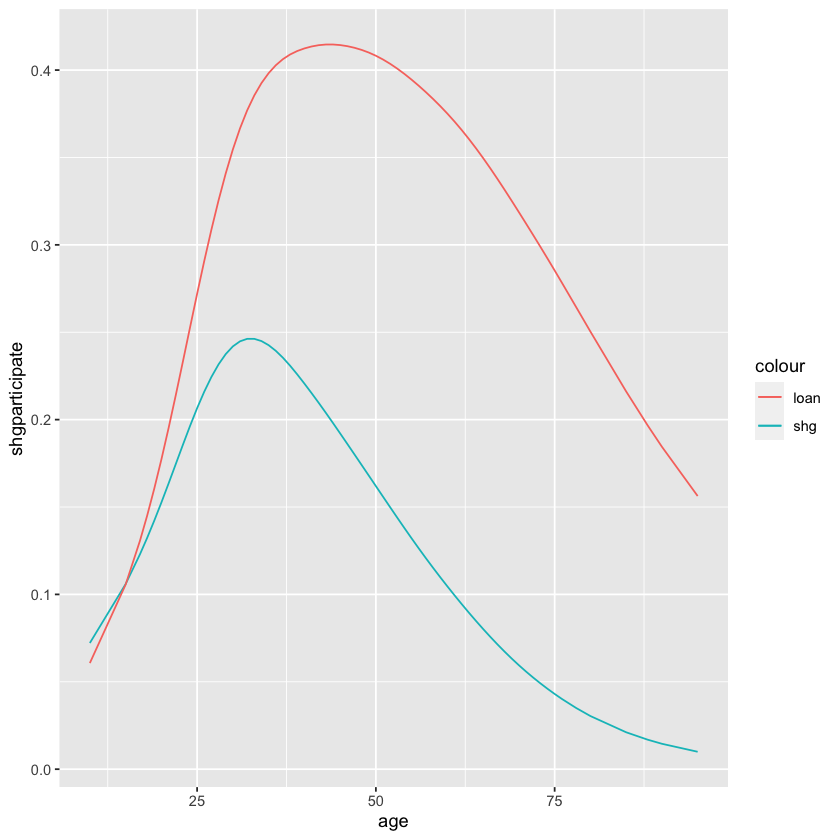

In [48]:
feature_age %>% mutate(value = predict(model, type='response')) %>%
    pivot_wider(names_from=name, values_from=value, values_fn = mean) %>%
    arrange(age) %>%
    ggplot(aes(x=age)) +
    geom_line(aes(y=shgparticipate, color='shg')) +
    geom_line(aes(y=activeloan, color='loan'))